In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy
from zipfile36 import ZipFile
from io import BytesIO
from sklearn.linear_model import LinearRegression

Request henter .zip filen fra Oxford Man

In [100]:
url = 'https://realized.oxford-man.ox.ac.uk/images/oxfordmanrealizedvolatilityindices.zip'
data = requests.get(url, stream=True).content

Zipfile udpakker filen, herefter gemmes den i en DataFrame

In [101]:
z = ZipFile(BytesIO(data))
z.extractall()
df = pd.read_csv('OxfordManRealizedVolatilityIndices.csv', index_col=0, header=0 )
print(df.columns)

Index(['Symbol', 'rv5_ss', 'rk_th2', 'rsv', 'nobs', 'close_time', 'rv10',
       'rk_parzen', 'bv_ss', 'medrv', 'close_price', 'rsv_ss', 'open_price',
       'bv', 'open_time', 'rk_twoscale', 'rv5', 'open_to_close', 'rv10_ss'],
      dtype='object')


In [102]:
df['Symbol'].unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

In [103]:
df = df.reset_index()
df = df.rename(columns={'index':'Date'})
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.date

In [104]:
df

,Date,Symbol,rv5_ss,rk_th2,rsv,nobs,close_time,rv10,rk_parzen,bv_ss,medrv,close_price,rsv_ss,open_price,bv,open_time,rk_twoscale,rv5,open_to_close,rv10_ss
0,2000-01-03,.AEX,0.000130,0.000102,0.000046,1795.0,163015.0,0.000178,0.000179,0.000100,0.000050,675.44,0.000046,675.67,0.000100,90101.0,0.000103,0.000130,-0.000340,0.000178
1,2000-01-04,.AEX,0.000201,0.000201,0.000147,1785.0,163016.0,0.000261,0.000423,0.000207,0.000075,642.25,0.000147,664.20,0.000207,90416.0,0.000199,0.000201,-0.033606,0.000261
2,2000-01-05,.AEX,0.000491,0.000345,0.000328,1801.0,163016.0,0.000714,0.000324,0.000361,0.000166,632.31,0.000328,633.37,0.000361,90016.0,0.000325,0.000491,-0.001675,0.000714
3,2000-01-06,.AEX,0.000225,0.000221,0.000116,1799.0,163002.0,0.000182,0.000219,0.000258,0.000152,624.21,0.000116,632.46,0.000258,90016.0,0.000218,0.000225,-0.013130,0.000182
4,2000-01-07,.AEX,0.000138,0.000123,0.000048,1798.0,163016.0,0.000157,0.000155,0.000130,0.000039,644.86,0.000048,628.93,0.000130,90046.0,0.000126,0.000138,0.025013,0.000157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157123,2022-01-31,.STOXX50E,0.000117,0.000152,0.000050,4158.0,173002.0,0.000121,0.000162,0.000109,0.000057,4154.25,0.000050,4161.77,0.000109,90015.0,0.000149,0.000117,-0.001809,0.000121
157124,2022-02-01,.STOXX50E,0.000153,0.000122,0.000058,4241.0,173015.0,0.000188,0.000155,0.000115,0.000030,4214.04,0.000058,4184.63,0.000115,90015.0,0.000122,0.000153,0.007004,0.000188
157125,2022-02-02,.STOXX50E,0.000033,0.000040,0.000017,4253.0,173015.0,0.000036,0.000024,0.000037,0.000014,4228.01,0.000017,4242.74,0.000037,90015.0,0.000039,0.000033,-0.003478,0.000036
157126,2022-02-03,.STOXX50E,0.000087,0.000100,0.000056,4156.0,173003.0,0.000089,0.000113,0.000095,0.000031,4142.80,0.000056,4215.41,0.000095,90015.0,0.000098,0.000087,-0.017375,0.000089


In [105]:
plt.style.use('ggplot')

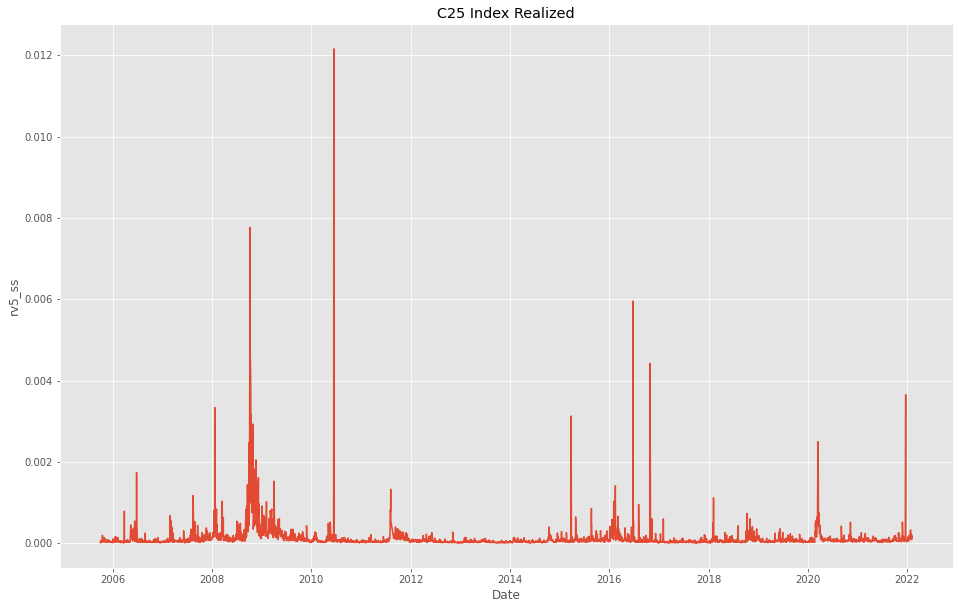

In [106]:
plt.rcParams['figure.figsize']=(16,10)

sns.lineplot(data=df[df['Symbol']== '.OMXC20'], x="Date", y="rv5_ss")

plt.title('C25 Index Realized')

plt.show()

In [107]:
df['rv5_diff'] = df['rv5'].diff()

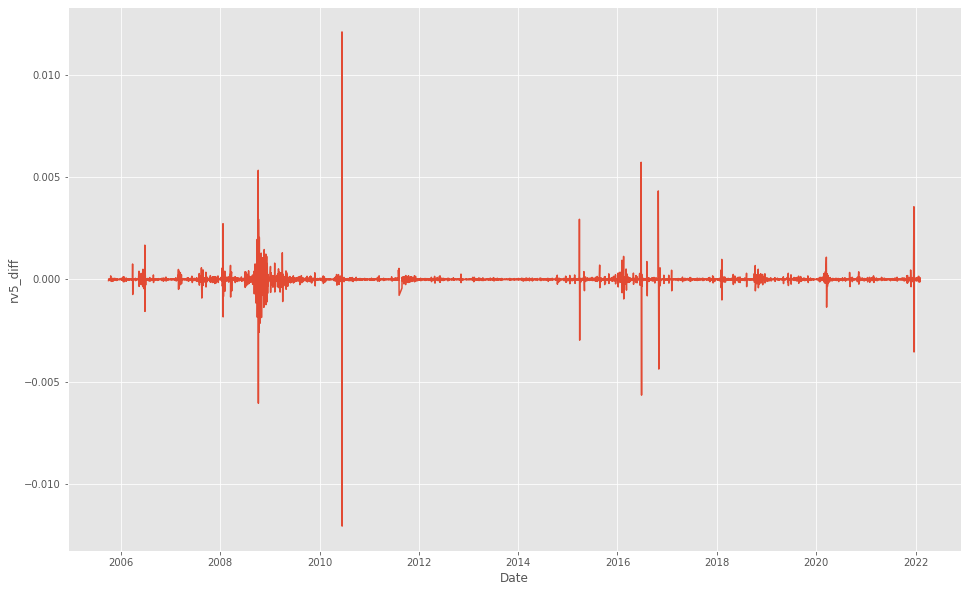

In [108]:
sns.lineplot(data=df[df['Symbol'] == '.OMXC20'], x="Date", y="rv5_diff")

plt.show()

## Hurst parameter

In [109]:
df2 = df[df['Symbol'] == '.SPX'][['Date', 'rv5']]

In [110]:
df2['rv5_log_vol'] = np.log(np.sqrt(df2['rv5']))

In [111]:
df2

,Date,rv5,rv5_log_vol
131505,2000-01-03,0.000141,-4.434032
131506,2000-01-04,0.000224,-4.201640
131507,2000-01-05,0.000314,-4.032610
131508,2000-01-06,0.000131,-4.470883
131509,2000-01-07,0.000094,-4.638124
...,...,...,...
137038,2022-01-28,0.000263,-4.122441
137039,2022-02-01,0.000106,-4.577071
137040,2022-02-02,0.000079,-4.723008
137041,2022-02-03,0.000109,-4.561142


In [112]:
#Fra grafer i paper benytter de cirka dette endepunkt
np.exp(4)

54.598150033144236

In [113]:
x = np.arange(1, 55)

In [114]:
fnc = lambda x, q: [np.mean(np.abs(df2['rv5_log_vol'] - df2['rv5_log_vol'].shift(delta)) ** q) for delta in x]

q = [0.5, 1, 1.5, 2, 3]

In [115]:
plot_df = []

plot_df.append(np.log(x))

for i in q:
    plot_df.append(np.log(fnc(x, i)))

plot_df = pd.DataFrame(np.transpose(plot_df))

In [116]:
plot_df = plot_df.rename(columns={0: 'x', 1: 'q = 0.5', 2:'q = 1', 3:'q = 1.5', 4:'q = 2', 5:'q = 3'})

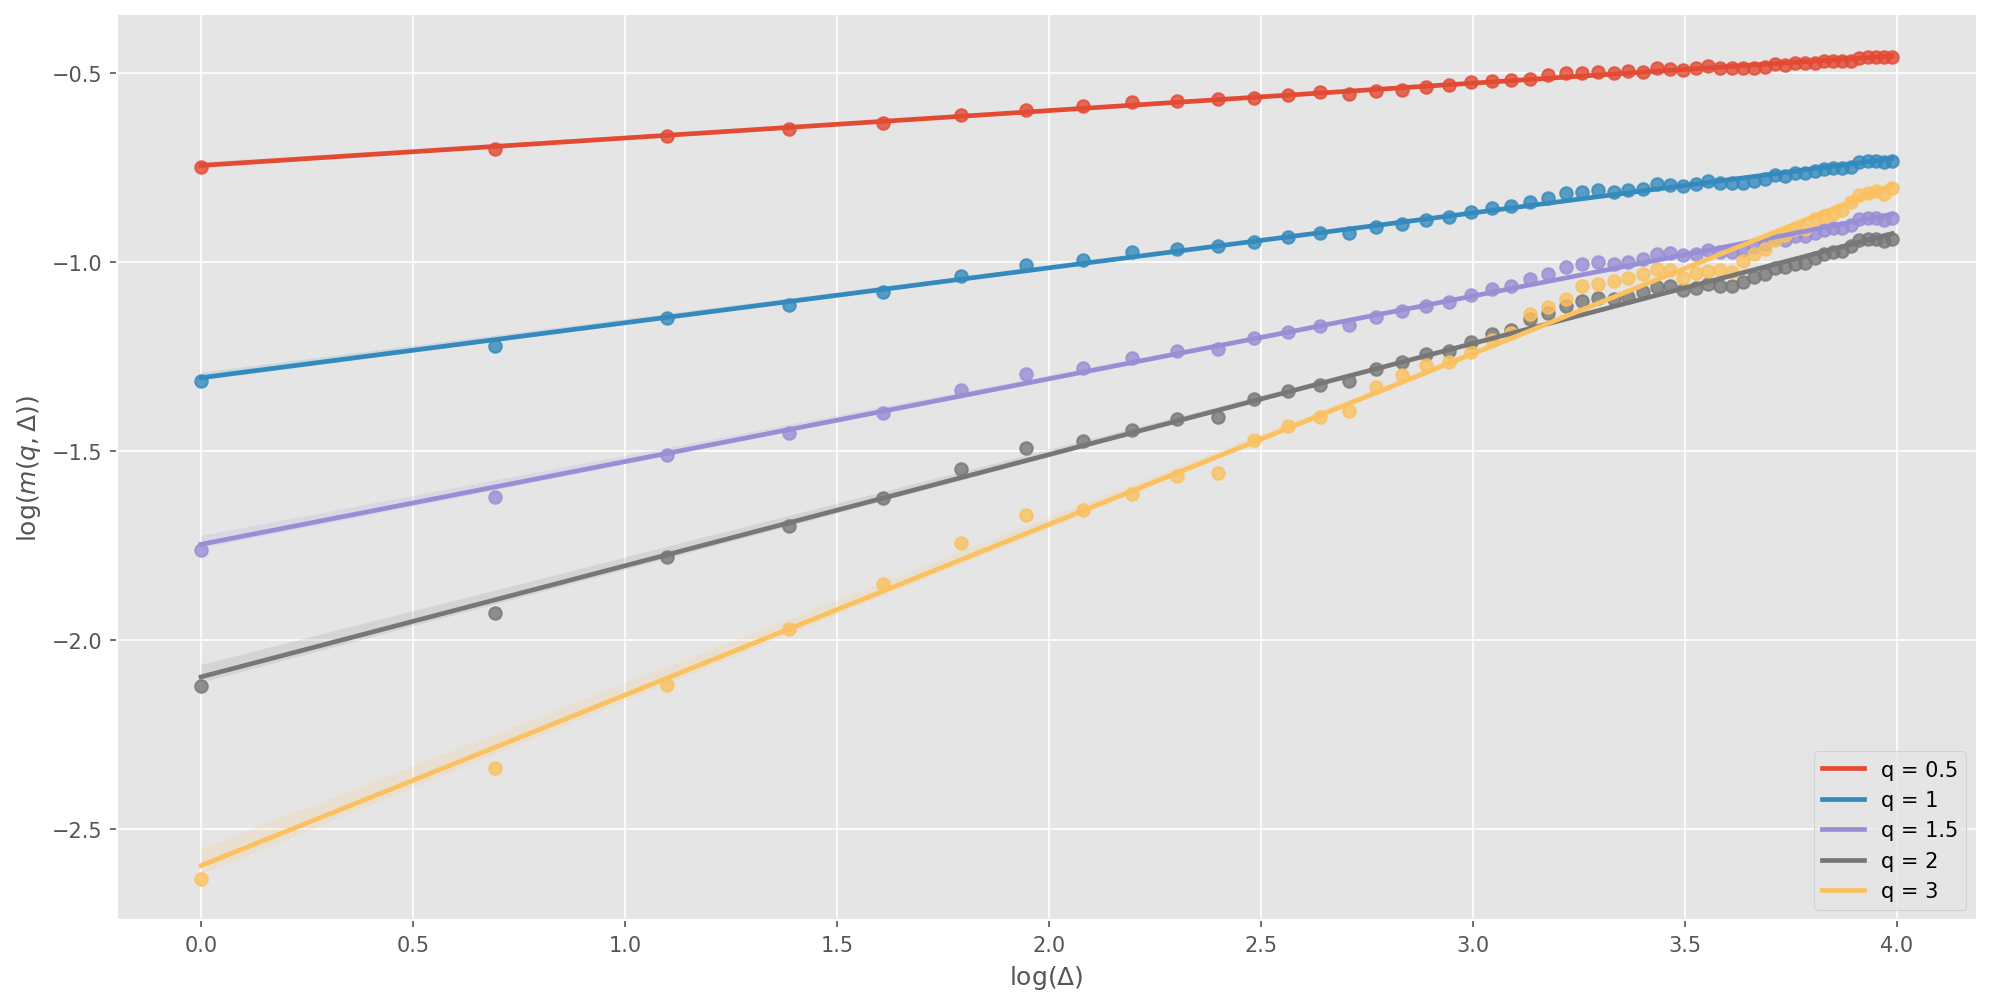

In [117]:
fig, ax = plt.subplots(1, 1, figsize = (16,8), dpi = 150)

for i in q:
    ax = sns.regplot(x='x', y='q = {}'.format(i), data=plot_df)

plt.legend(labels=['q = 0.5','q = 1','q = 1.5','q = 2','q = 3'])
plt.xlabel('$\log (\Delta)$')
plt.ylabel('$\log (m(q,\Delta))$')
plt.show()

In [118]:
model = []

for i in q:
    z = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fnc(x, i)))
    model.append(z.coef_)

model = pd.DataFrame(np.transpose(model))

In [119]:
model

,0,1,2,3,4
0,0.072623,0.145405,0.219025,0.294186,0.451615


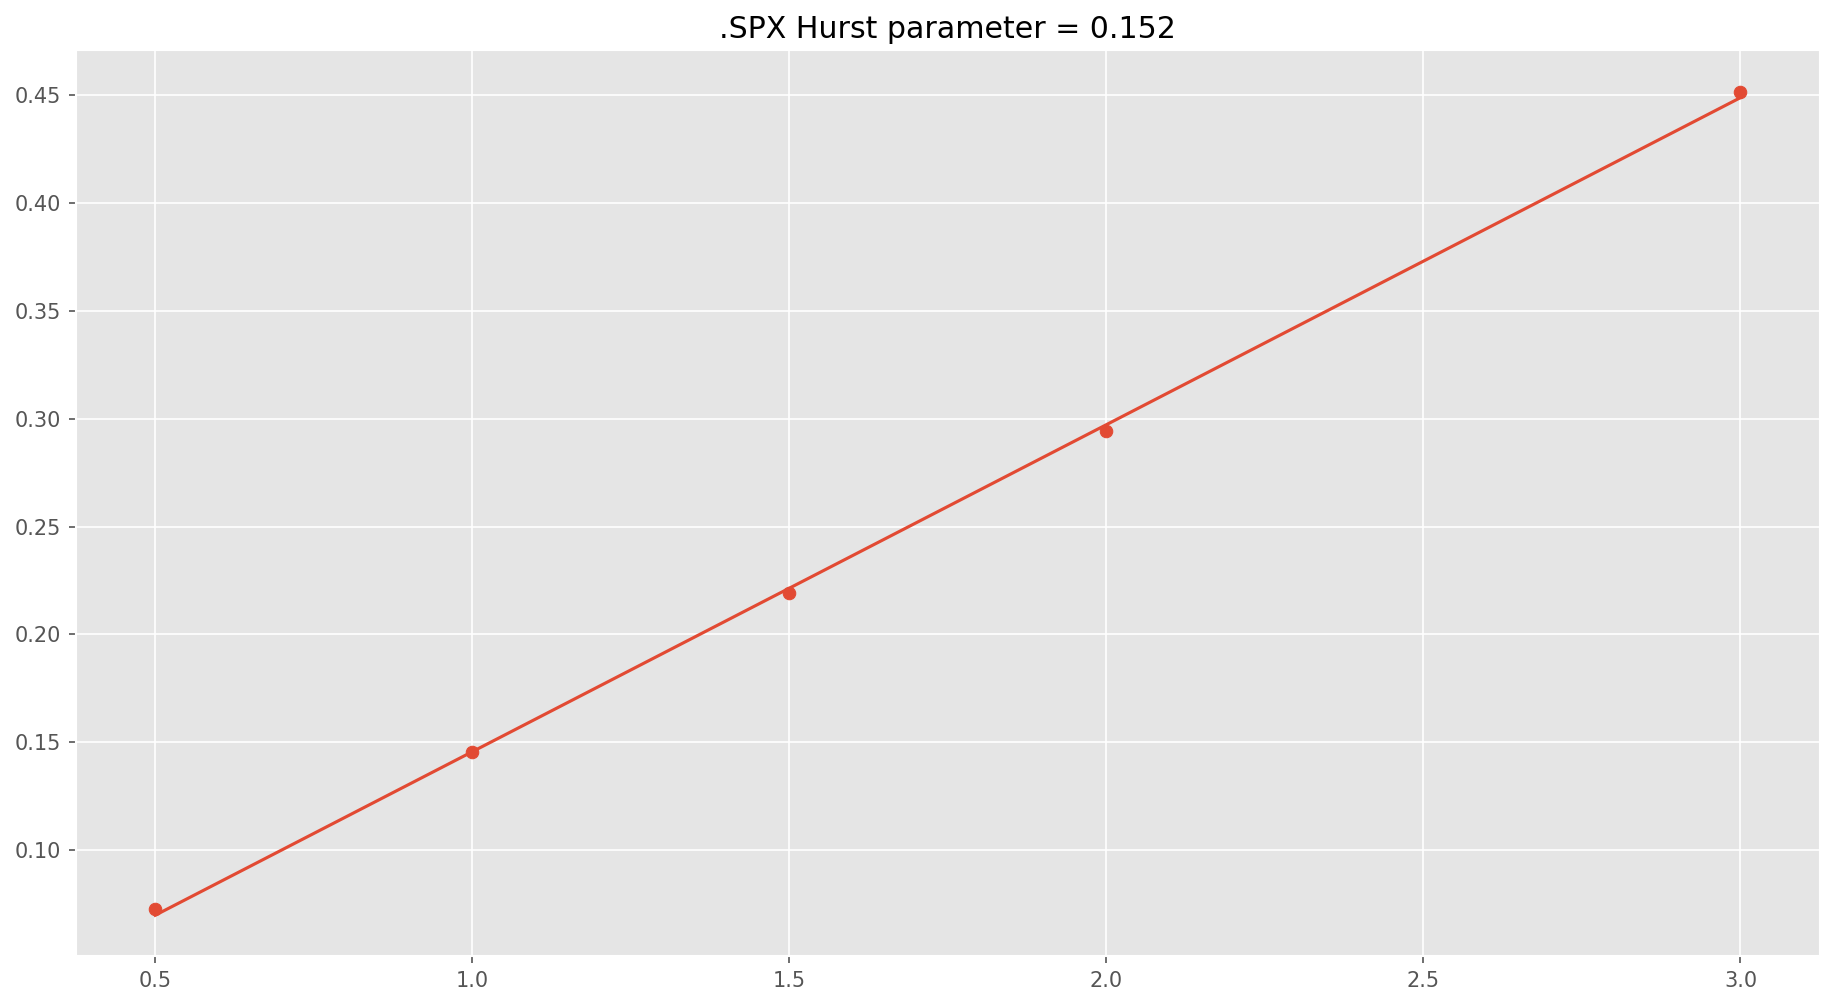

In [120]:
fig, ax = plt.subplots(1, 1, figsize = (15,8), dpi = 150)

b, a = np.polyfit(q, model.loc[0,:], 1)

plt.scatter(q, model)
plt.plot(q, b*np.array(q)+a)

plt.title('.SPX Hurst parameter = {:.3f}'.format(b))

plt.show()

In [121]:
df2 = df[df['Symbol'] == '.OMXC20'][['Date', 'rv5']]

In [122]:
df2['rv5_log_vol'] = np.log(np.sqrt(df2['rv5']))

In [123]:
df2

,Date,rv5,rv5_log_vol
104388,2005-10-02,0.000019,-5.441547
104389,2005-10-03,0.000036,-5.120729
104390,2005-10-04,0.000048,-4.969581
104391,2005-10-05,0.000069,-4.787467
104392,2005-10-06,0.000050,-4.951339
...,...,...,...
108445,2022-01-31,0.000151,-4.400488
108446,2022-02-01,0.000219,-4.214017
108447,2022-02-02,0.000094,-4.638712
108448,2022-02-03,0.000167,-4.348366


In [124]:
#Fra grafer i paper benytter de cirka dette endepunkt
np.exp(4)

54.598150033144236

In [125]:
x = np.arange(1, 55)

In [126]:
fnc = lambda x, q: [np.mean(np.abs(df2['rv5_log_vol'] - df2['rv5_log_vol'].shift(delta)) ** q) for delta in x]

q = [0.5, 1, 1.5, 2, 3]

In [127]:
plot_df = []

plot_df.append(np.log(x))

for i in q:
    plot_df.append(np.log(fnc(x, i)))

plot_df = pd.DataFrame(np.transpose(plot_df))

In [128]:
plot_df = plot_df.rename(columns={0: 'x', 1: 'q = 0.5', 2:'q = 1', 3:'q = 1.5', 4:'q = 2', 5:'q = 3'})

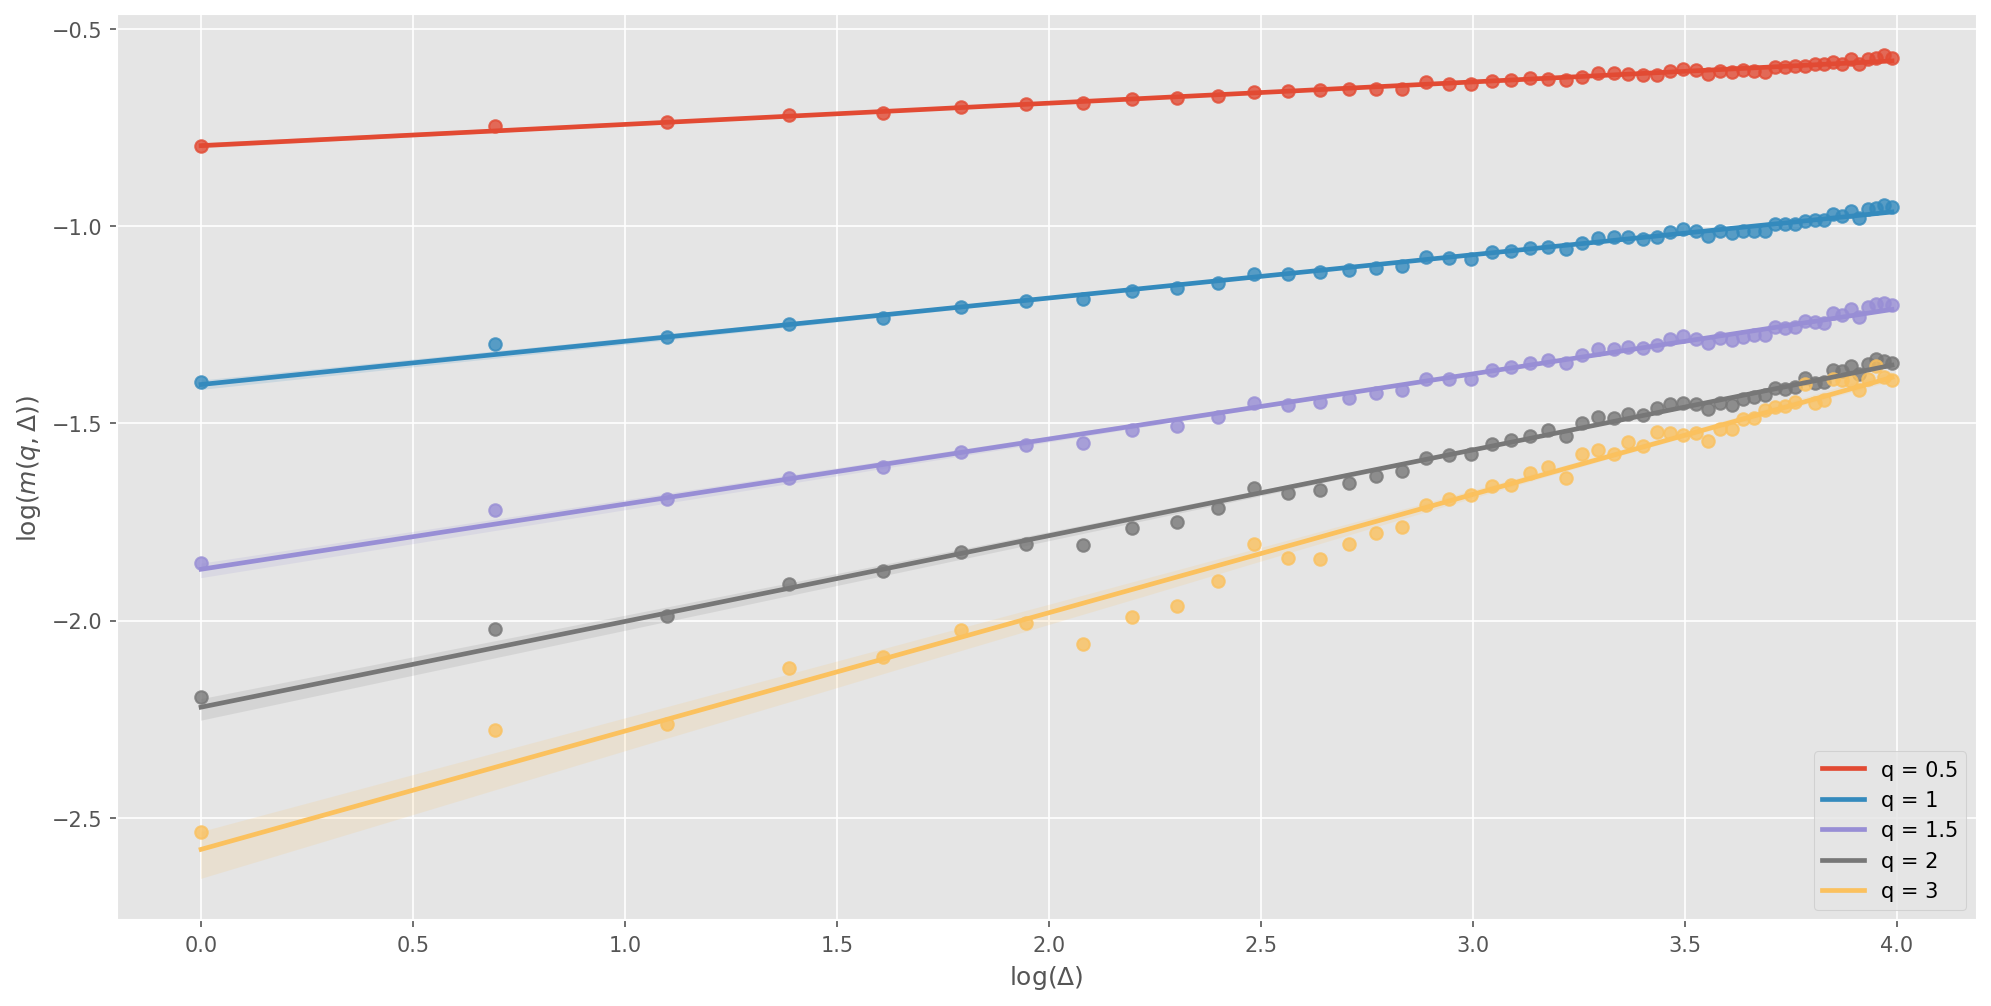

In [129]:
fig, ax = plt.subplots(1, 1, figsize = (16,8), dpi = 150)

for i in q:
    ax = sns.regplot(x='x', y='q = {}'.format(i), data=plot_df)

plt.legend(labels=['q = 0.5','q = 1','q = 1.5','q = 2','q = 3'])
plt.xlabel('$\log (\Delta)$')
plt.ylabel('$\log (m(q,\Delta))$')
plt.show()

In [130]:
model = []

for i in q:
    z = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fnc(x, i)))
    model.append(z.coef_)

model = pd.DataFrame(np.transpose(model))

In [131]:
model

,0,1,2,3,4
0,0.053881,0.109735,0.165216,0.217528,0.300167


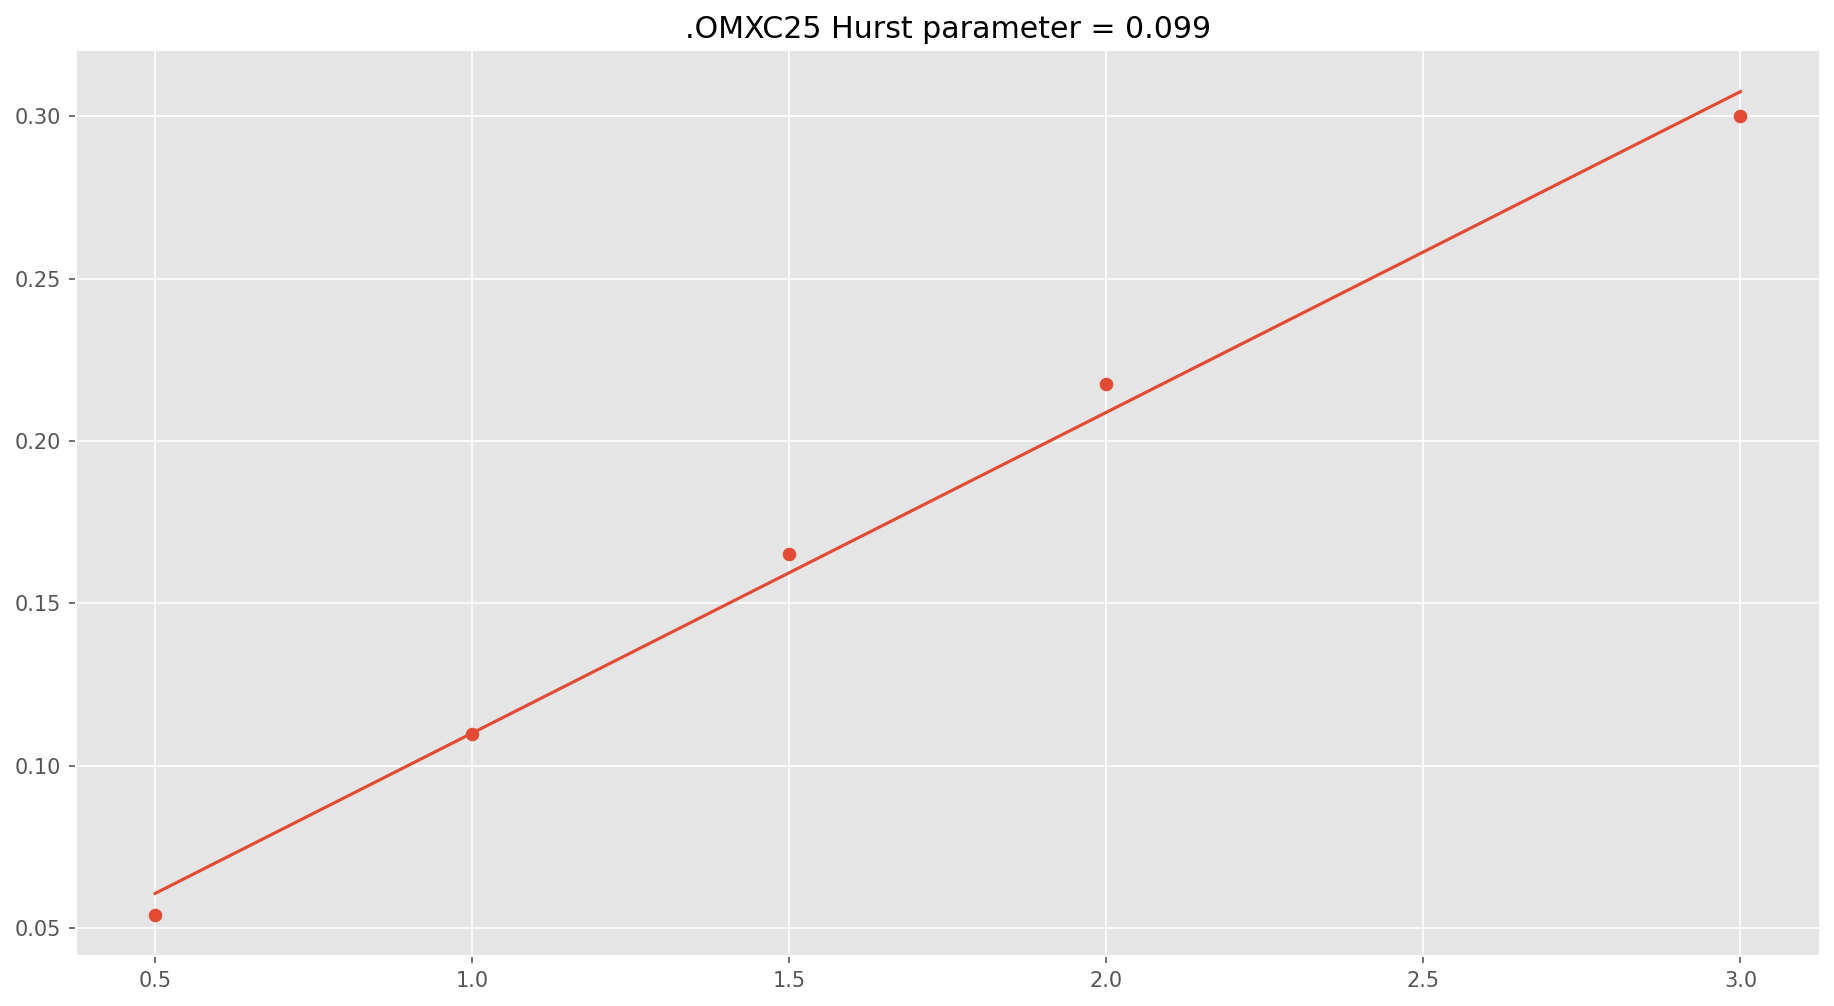

In [132]:
fig, ax = plt.subplots(1, 1, figsize = (15,8), dpi = 150)

b, a = np.polyfit(q, model.loc[0,:], 1)

plt.scatter(q, model)
plt.plot(q, b*np.array(q)+a)

plt.title('.OMXC25 Hurst parameter = {:.3f}'.format(b))

plt.show()

In [155]:
def hurst_calc(data, symbol, date_start = None, date_end = None):
    data = data[data['Symbol'] == symbol][['Date', 'rv5']]
    data = data[data.rv5 != 0]
    data = data[(data['Date'] <= pd.to_datetime(date_end)) & (data['Date'] >= pd.to_datetime(date_start))]
    data['rv5_log_vol'] = np.log(np.sqrt(data['rv5']))
    
    x = np.arange(1, 55)
    fnc = lambda x, q: [np.mean(np.abs(data['rv5_log_vol'] - data['rv5_log_vol'].shift(delta)) ** q) for delta in x]
    
    model = []
    
    for i in q:
        z = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fnc(x, i)))
        model.append(z.coef_)

    model = pd.DataFrame(np.transpose(model))
    
    b, a = np.polyfit(q, model.loc[0,:], 1)
    
    return b

In [ ]:
date_start = '2007-01-03'
date_end = '2022-02-04'

In [143]:
h = hurst_calc(df, '.OMXC20', date_start, date_end)
h

0.09963239894597938

In [184]:
hurst_tabel = []

for i in df['Symbol'].unique():
    hurst_tabel.append(hurst_calc(df, i, date_start, date_end))

hurst_tabel = pd.DataFrame(hurst_tabel, index =[df['Symbol'].unique()], columns = ['Hurst'])
hurst_tabel

,Hurst
.AEX,0.143185
.AORD,0.113303
.BFX,0.139319
.BSESN,0.123512
.BVLG,0.168614
.BVSP,0.153089
.DJI,0.145670
.FCHI,0.133984
.FTMIB,0.126317
.FTSE,0.108849


In [185]:
date_start = '2000-01-03'
date_end = '2014-02-04'

In [186]:
hurst_tabel = []

for i in df['Symbol'].unique():
    hurst_tabel.append(hurst_calc(df, i, date_start, date_end))

hurst_tabel = pd.DataFrame(hurst_tabel, index =[df['Symbol'].unique()], columns = ['Hurst'])
hurst_tabel

,Hurst
.AEX,0.127665
.AORD,0.075546
.BFX,0.136459
.BSESN,0.103962
.BVLG,0.082322
.BVSP,0.110707
.DJI,0.104646
.FCHI,0.118661
.FTMIB,0.104740
.FTSE,0.112437


In [187]:
date_start = '2010-01-03'
date_end = '2022-01-05'

In [188]:
hurst_tabel = []

for i in df['Symbol'].unique():
    hurst_tabel.append(hurst_calc(df, i, date_start, date_end))

hurst_tabel = pd.DataFrame(hurst_tabel, index =[df['Symbol'].unique()], columns = ['Hurst'])
hurst_tabel

,Hurst
.AEX,0.143322
.AORD,0.120577
.BFX,0.139494
.BSESN,0.122314
.BVLG,0.169062
.BVSP,0.150774
.DJI,0.146009
.FCHI,0.132936
.FTMIB,0.131604
.FTSE,0.105467


## Log diff distribution 

In [10]:
plot_df = df[df['Date'] <= pd.to_datetime('2014-03-31')] #Datoer fra Volatility is Rough
plot_df = plot_df[plot_df['rv5'] != 0] #Log(0) går ikke, har ikke undersøgt hvorfor vol estimeres til 0 på enkelte dage (21 ud af plot_df)

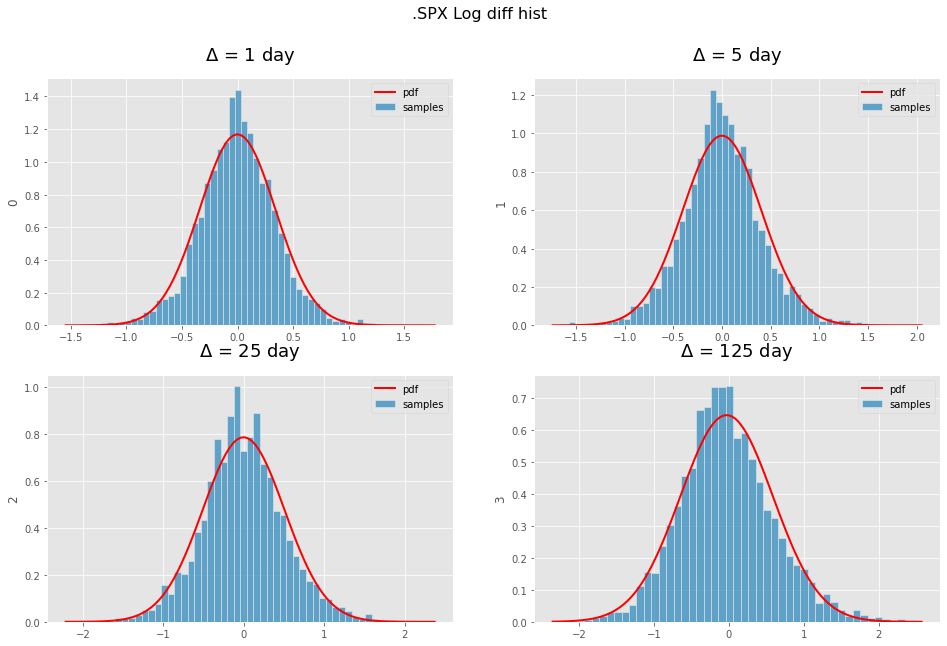

In [12]:
nrow = 2
ncol = 2
delta = [1, 5, 25, 125]

fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.SPX']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.SPX']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.SPX Log diff hist', fontsize=16)
plt.show()

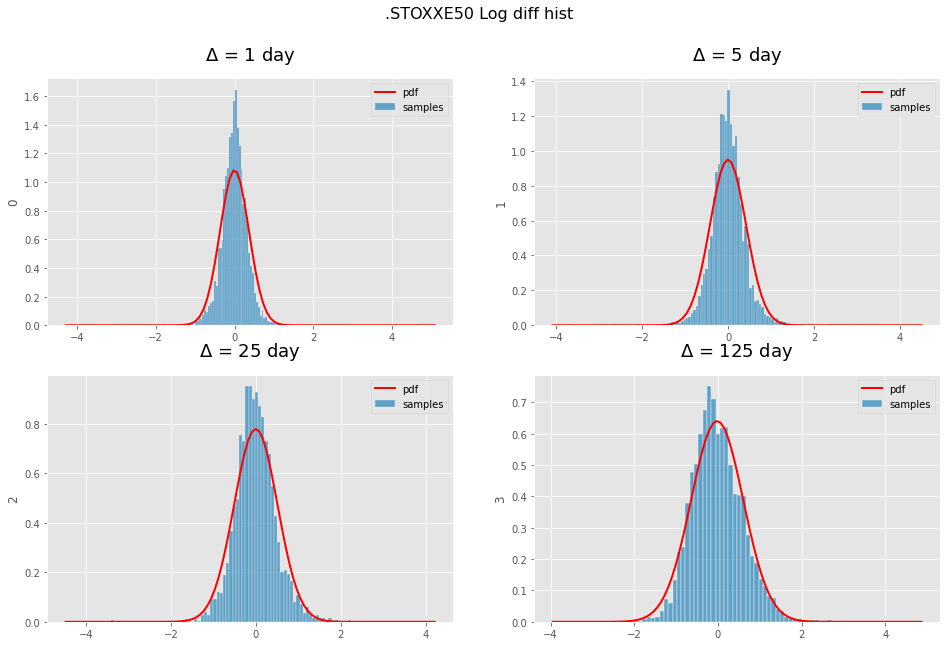

In [14]:
fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.STOXX50E']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.STOXX50E']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.STOXXE50 Log diff hist', fontsize=16)
plt.show()

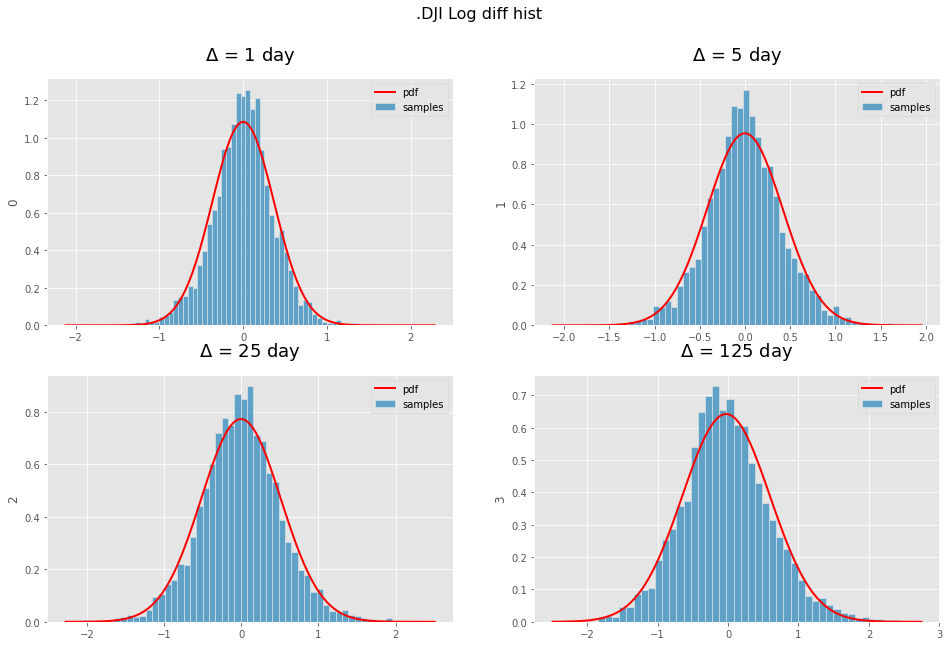

In [15]:
fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.DJI']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.DJI']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.DJI Log diff hist', fontsize=16)
plt.show()